# Import Modules

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV

In [23]:
df = pd.read_csv("../data/sample_dataset.csv", sep="[,;:]", index_col=False)
df.head()

/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,track_id,type,traveled_d,avg_speed,lat,lon,speed,lon_acc,lat_acc,time
0,1,Car,7.42,44.545908,37.979512,23.733515,48.0517,-4.5026,-1.9331,0
1,2,Car,16.23,41.728189,37.979441,23.733581,42.6205,-0.0145,0.2673,0
2,3,Car,18.97,37.939984,37.979441,23.733657,38.5098,-0.0088,0.1863,0
3,4,Bus,29.28,26.352020,37.979420,23.733730,24.9054,-0.0296,-0.0261,0
4,5,Medium Vehicle,37.85,40.074858,37.979293,23.733788,38.7187,-0.0620,-0.0132,0


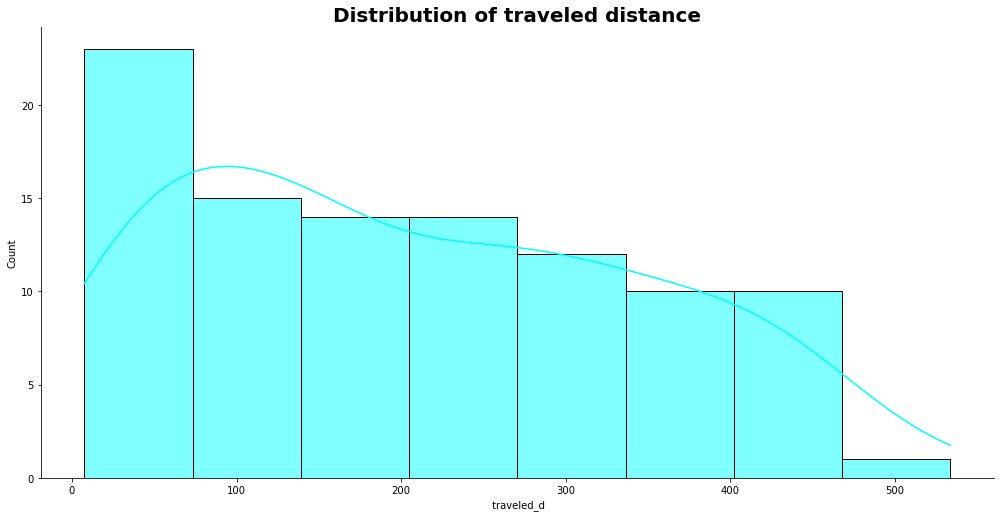

In [30]:
sns.displot(data=df,x=" traveled_d", color="cyan",
                    kde=True, height=7, aspect=2)
plt.title(f'Distribution of traveled distance', size=20, fontweight='bold')
plt.show()

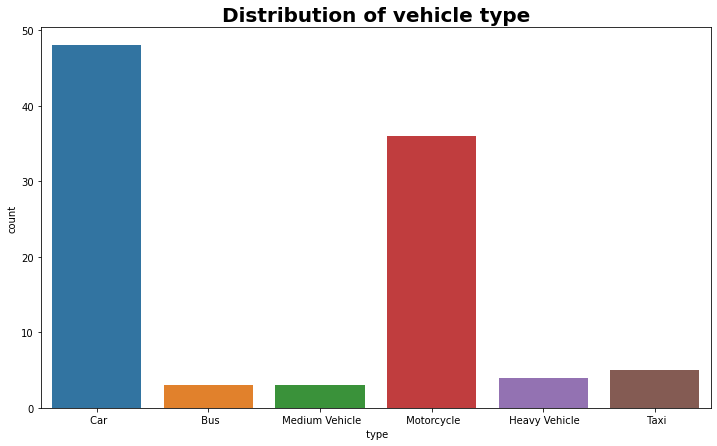

In [26]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x=" type")
plt.title(f'Distribution of vehicle type', size=20, fontweight='bold')
plt.show()

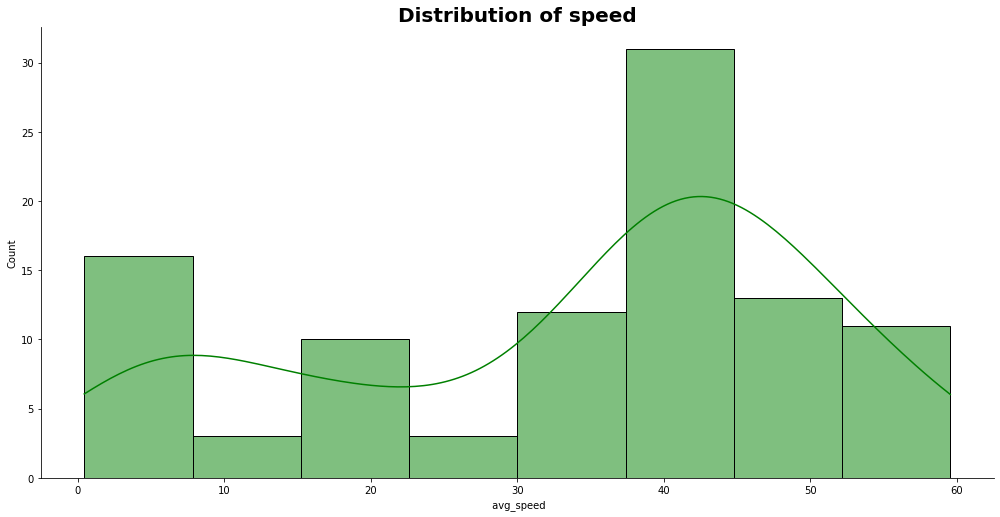

In [31]:
sns.displot(data=df, x=" avg_speed", color="green",
                    kde=True, height=7, aspect=2)
plt.title(f'Distribution of speed', size=20, fontweight='bold')
plt.show()

In [32]:
temp_df = df[[" type" , " traveled_d" , " avg_speed" , " speed" , " time"]]


In [33]:
temp_df[' type'].value_counts()


 Car               48
 Motorcycle        36
 Taxi               5
 Heavy Vehicle      4
 Bus                3
 Medium Vehicle     3
Name:  type, dtype: int64

In [35]:
import warnings
warnings.filterwarnings('ignore')
temp_df.loc[temp_df[' type'] == " Motorcycle", ' type'] = 1
temp_df.loc[temp_df[' type'] == " Car", ' type'] = 2
temp_df.loc[temp_df[' type'] == " Bus", ' type'] = 3
temp_df.loc[temp_df[' type'] == " Taxi", ' type'] = 4
temp_df.loc[temp_df[' type'] == " Medium Vehicle", ' type'] = 5
temp_df.loc[temp_df[' type'] == " Heavy Vehicle", ' type'] = 6
temp_df[" type"] = temp_df[" type"].astype("float64")
temp_df

,type,traveled_d,avg_speed,speed,time
0,2.0,7.42,44.545908,48.0517,0
1,2.0,16.23,41.728189,42.6205,0
2,2.0,18.97,37.939984,38.5098,0
3,3.0,29.28,26.352020,24.9054,0
4,5.0,37.85,40.074858,38.7187,0
...,...,...,...,...,...
94,1.0,533.80,3.152392,0.0000,0
95,2.0,182.82,1.679774,0.0000,0
96,6.0,262.17,5.644714,0.0000,0
97,6.0,86.19,0.434700,3.2327,0


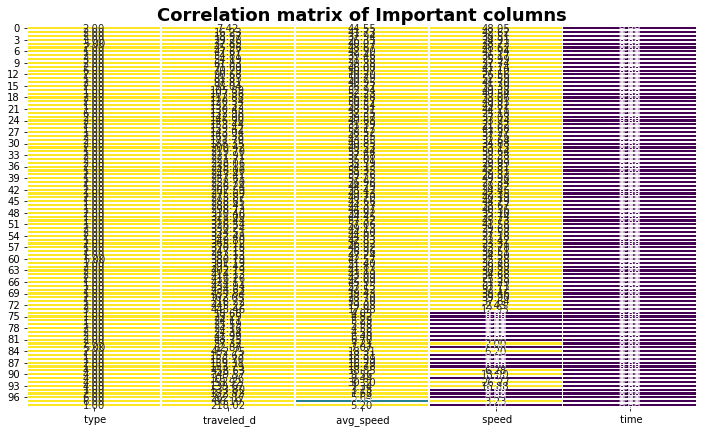

In [36]:
plt.figure(figsize=(12, 7))
sns.heatmap(temp_df, annot=True, cmap='viridis', vmin=0,
                    vmax=1, fmt='.2f', linewidths=.7, cbar=False)
plt.title("Correlation matrix of Important columns", size=18, fontweight='bold')
plt.show()